In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Probability density function
def laplace_pdf(x):
    return 0.5 * np.exp(-np.abs(x))

# Implement the Metropolis-Hastings algorithm
def metropolis_hastings(N, s, x0):
    samples = [x0]
    for _ in range(1, N):
        x_current = samples[-1]
        x_proposed = np.random.normal(x_current, s)
        r = laplace_pdf(x_proposed) / laplace_pdf(x_current)
        
        if np.random.rand() < r:
            samples.append(x_proposed)
        else:
            samples.append(x_current)
    return samples

In [7]:
def compute_diagnostics(chains):
    N = len(chains[0])
    J = len(chains)
    
    # Calculate within-chain variances
    V = [np.var(chain, ddof=1) for chain in chains]
    
    # Calculate chain means
    M = [np.mean(chain) for chain in chains]
    
    # Overall mean
    M_overall = np.mean(M)
    
    # Between-chain variance
    B = N * np.var(M, ddof=1)
    
    # Within-chain variance
    W = np.mean(V)
    
    # Potential scale reduction factor
    R_hat = np.sqrt((N - 1)/N + B/(N*W))
    
    return R_hat


In [8]:
# Run diagnostics
def run_diagnostics(N, s_values, J=4):
    R_hats = []
    for s in s_values:
        chains = []
        for j in range(J):
            x0 = np.random.rand()  # Different initial value for each chain
            chain = metropolis_hastings(N, s, x0)
            chains.append(chain)
        R_hat = compute_diagnostics(chains)
        R_hats.append(R_hat)
    
    return s_values, R_hats


In [9]:
s_values = np.linspace(0.001, 1.0, 100)
s_values, R_hats = run_diagnostics(2000, s_values)


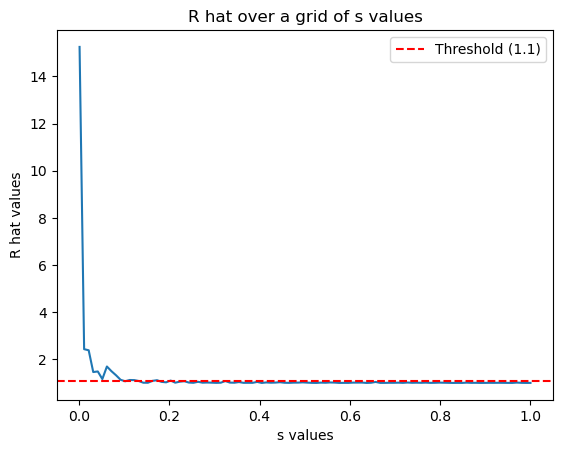

In [10]:
# Plotting
plt.plot(s_values, R_hats)
plt.axhline(y=1.1, color='r', linestyle='--', label='Threshold (1.1)')
plt.xlabel('s values')
plt.ylabel('R hat values')
plt.title('R hat over a grid of s values')
plt.legend()
plt.show()